<a href="https://colab.research.google.com/github/Harie-Lab/harie-Zemi/blob/main/ATL(%E4%BF%AE%E6%AD%A3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch===1.6.0 torchvision===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip install pytorch-metric-learning
!pip install pytorch-metric-learning[with-hooks]
!pip install umap-learn

import torch
import torchvision
# transform is used for basic image transformation
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#matplotlib is a plotting library to plot graphs
import matplotlib.pyplot as plt
import numpy as np


from pytorch_metric_learning import losses,miners,testers
from pytorch_metric_learning.distances import CosineSimilarity
from pytorch_metric_learning.reducers import ThresholdReducer
from pytorch_metric_learning.utils.accuracy_calculator import AccuracyCalculator

from pytorch_metric_learning.miners import TripletMarginMiner
from pytorch_metric_learning.distances import CosineSimilarity
from pytorch_metric_learning.losses import TripletMarginLoss
from pytorch_metric_learning.reducers import ThresholdReducer
#from pytorch_metric_learning.miners import BaseTupleMiner
from pytorch_metric_learning.miners import BaseMiner


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch===1.6.0 (from versions: 1.7.1, 1.7.1+cpu, 1.7.1+cu101, 1.7.1+cu110, 1.7.1+cu92, 1.7.1+rocm3.7, 1.7.1+rocm3.8, 1.8.0, 1.8.0+cpu, 1.8.0+cu101, 1.8.0+cu111, 1.8.0+rocm3.10, 1.8.0+rocm4.0.1, 1.8.1, 1.8.1+cpu, 1.8.1+cu101, 1.8.1+cu102, 1.8.1+cu111, 1.8.1+rocm3.10, 1.8.1+rocm4.0.1, 1.9.0, 1.9.0+cpu, 1.9.0+cu102, 1.9.0+cu111, 1.9.0+rocm4.0.1, 1.9.0+rocm4.1, 1.9.0+rocm4.2, 1.9.1, 1.9.1+cpu, 1.9.1+cu102, 1.9.1+cu111, 1.9.1+rocm4.0.1, 1.9.1+rocm4.1, 1.9.1+rocm4.2, 1.10.0, 1.10.0+cpu, 1.10.0+cu102, 1.10.0+cu111, 1.10.0+cu113, 1.10.0+rocm4.0.1, 1.10.0+rocm4.1, 1.10.0+rocm4.2, 1.10.1, 1.10.1+cpu, 1.10.1+cu102, 1.10.1+cu111, 1.10.1+cu113, 1.10.1+rocm4.0.1, 1.10.1+rocm4.1, 1.10.1+rocm4.2, 1.10.2, 1.10.2+cpu, 1.10.2+cu102, 1.10.2+cu111, 1.10.2+cu113, 1.10.2+rocm4.0.1, 

In [ ]:
transform = transforms.Compose(
    [transforms.Resize((32,32)), #resize the image to height and width to 32
    transforms.ToTensor(),        #store as tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

NameError: ignored

In [ ]:
#parameters
epochs = 10
batch_size = 5
test_predicted_metrics = []
test_true_labels = []

distance = CosineSimilarity()
reducer = ThresholdReducer(high = 0.1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trainset = torchvision.datasets.ImageFolder(root = './drive/MyDrive/DeerImage/train/', transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle=True,num_workers=0)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5) #(in_channel,out_channel , kernal_size)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()
mining_func = miners.TripletMarginMiner(margin = 0.2, distance = distance)
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
loss_func = losses.TripletMarginLoss()
epochs = 10

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

from pytorch_metric_learning import losses, miners, testers
from pytorch_metric_learning.distances import CosineSimilarity
from pytorch_metric_learning.reducers import ThresholdReducer
from pytorch_metric_learning.utils.accuracy_calculator import AccuracyCalculator
from pytorch_metric_learning.miners import TripletMarginMiner, BaseMiner
from pytorch_metric_learning.losses import TripletMarginLoss
from pytorch_metric_learning.utils import loss_and_miner_utils as lmu


def labels_max(dataloader):
    max_l = 0
    for i, (inputs, labels) in enumerate(dataloader):
        if max_l < labels.max():
            max_l = labels.max().item()
    return max_l



In [ ]:
def CenterOfClass(dataloader, max_label):
    center_list = torch.empty(max_label+1, 10)
    count = [0]*(max_label + 1)
    list_ = []
    for i, (inputs, labels) in enumerate(dataloader):
        inputs, labels = inputs.to('cpu'), labels.to('cpu')
        optimizer.zero_grad()
        embeddings = net(inputs.to('cpu'))
        for ind, l in enumerate(labels):
            center_list[l.item()] = torch.add(center_list[l.item()], embeddings[ind])
            count[l.item()] = count[l.item()]+1
    for i, c in enumerate(count):
        list_.append(torch.div(center_list[i], c))
    return list_


修正

In [ ]:
from pytorch_metric_learning.miners import BaseMiner
from pytorch_metric_learning.utils import loss_and_miner_utils as lmu

class TestMiner(BaseMiner):
    def __init__(self, margin=0.2, **kwargs):
        super().__init__(**kwargs)
        self.margin = margin
        self.add_to_recordable_attributes(list_of_names=["margin"], is_stat=False)

    def mine(self, embeddings, labels, ref_emb, ref_labels):
        a1, p, a2, n = lmu.get_all_pairs_indices(labels, ref_labels)

        mat = self.distance(embeddings, ref_emb)
        ap_dist = mat[a1, p]
        np_dist = mat[a2, n]
        pos_mask = (
            ap_dist < self.margin
            if self.distance.is_inverted
            else ap_dist > self.margin
        )
        neg_mask = (
            np_dist < self.margin
            if self.distance.is_inverted
            else np_dist > self.margin
        )
        return a1[pos_mask], p[pos_mask], a2[neg_mask], n[neg_mask]


In [ ]:
def get_center_pair(labels, center_a, center_n, ref_labels=None):
    if ref_labels is None:
        ref_labels = labels

    a_label = torch.full((len(labels), ),  center_a)
    a_label = a_label.unsqueeze(0)
    print("a_label {}".format(a_label))
    if center_a == 0:
        a_label1 = torch.full((len(labels), ),  1)
    else:
        a_label1 = torch.empty(len(labels))

    n_label = torch.full((len(labels), ),  center_n)


    a_label1[-1] = center_a
    a_label1 = a_label1.unsqueeze(1)
    #print("a_label1 {}".format(a_label1))
    a_maches = a_label == a_label1
    #print("a_maches {}".format(a_maches))



    labels1 = labels.unsqueeze(1)
    labels2 = ref_labels.unsqueeze(0)
    n_label = n_label.unsqueeze(1)


    #mask = labels2 == n_label
    #print("mask: {}".format(mask.size()))
    #mask = torch.logical_and(mask, a_maches)


    maches = (labels1 == labels2)
    #print("maches: {}".format(maches))
    diffs = torch.logical_not(maches)
    mask = (labels2 == n_label)


    #print("diffs {}".format(diffs))
    #print("mask {}".format(mask))

    dummy_maches = torch.logical_and(maches, a_maches).byte()
    #print("dummy_maches {}".format(dummy_maches))
    #dummy_diffs = torch.logical_and(diffs, mask).byte()
    dummy_diffs_ = torch.logical_and(diffs, a_maches)
    #print("dummy_diffs_ {}".format(dummy_diffs_))
    dummy_diffs = torch.logical_and(dummy_diffs_, mask).byte()
    #print("dummy_diffs {}".format(dummy_diffs))
    if ref_labels is labels:
        dummy_maches.fill_diagonal_(0)

    d_anchor_idx1, d_p_idx = torch.where(dummy_maches)
    d_anchor_idx2, d_n_idx = torch.where(dummy_diffs)


    return d_anchor_idx1, d_p_idx, d_anchor_idx2, d_n_idx

修正

In [ ]:
def Make_center(labels, embeddings, l, e):
    l = torch.tensor((l,))
    labels1 = torch.cat((labels, l), dim=0)
    embeddings1 = torch.cat((embeddings, e.unsqueeze(0).clone()), dim = 0)
    return labels1, embeddings1


In [ ]:
def Make_center_original(labels, embeddings, l, e):
    l = torch.tensor((l,))
    labels1 = torch.cat((labels, l), dim=0)
    embeddings1 = torch.cat((embeddings, e.unsqueeze(0)), dim = 0)
    return labels1, embeddings1





修正

In [ ]:
from pytorch_metric_learning.miners import BaseMiner

class CenterMiner(BaseMiner):
    def __init__(self, margin_a, margin_b, center_a, center_n, e_a, e_n, labels, embeddings, **kargs):
        super().__init__(**kargs)
        self.margin_a = margin_a
        self.margin_b = margin_b
        self.labels = labels
        self.embeddings = embeddings
        self.ca = center_a
        self.cn = center_n
        self.add_to_recordable_attributes(list_of_names=["margin_a", "margin_b"], is_stat=False)

    def mine(self, embeddings, labels):
        a1, p, a2, n = get_center_pair(labels, self.ca, self.cn, self.labels)
        print("a1 {}, p {}, a2 {}, n {}".format(a1, p, a2, n))

        mat = self.distance(embeddings, self.embeddings)
        ap_dist = mat[a1, p]
        an_dist = mat[a2, n]
        pos_mask = (
            ap_dist < self.margin_a
            if self.distance.is_inverted
            else ap_dist > self.margin_a
        )
        neg_mask = (
            an_dist > self.margin_b
            if self.distance.is_inverted
            else an_dist < self.margin_b
        )
        return a1[pos_mask], p[pos_mask], a2[neg_mask], n[neg_mask]


In [ ]:
class AugmentedTripletMarginLoss_a(losses.BaseMetricLossFunction):
    """
    Args:
        margin: The desired difference between the anchor-positive distance and the
                anchor-negative distance.
        swap: Use the positive-negative distance instead of anchor-negative distance,
              if it violates the margin more.
        smooth_loss: Use the log-exp version of the triplet loss
    """

    def __init__(
        self,
        margin=0.05,
        swap=False,
        smooth_loss=False,
        triplets_per_anchor="all",
        **kwargs
    ):
        super().__init__(**kwargs)
        self.margin = margin
        self.swap = swap
        self.smooth_loss = smooth_loss
        self.triplets_per_anchor = triplets_per_anchor
        self.add_to_recordable_attributes(list_of_names=["margin"], is_stat=False)

    def compute_loss(self, embeddings, labels, indices_tuple):
        indices_tuple = lmu.convert_to_triplets(
            indices_tuple, labels, t_per_anchor=self.triplets_per_anchor
        )
        anchor_idx, positive_idx, negative_idx = indices_tuple
        if len(anchor_idx) == 0:
            return self.zero_losses()
        mat = self.distance(embeddings)
        ap_dists = mat[anchor_idx, positive_idx]
        an_dists = mat[anchor_idx, negative_idx]
        if self.swap:
            pn_dists = mat[positive_idx, negative_idx]
            an_dists = self.distance.smallest_dist(an_dists, pn_dists)

        violation = self.margin - ap_dists
        if self.smooth_loss:
            loss = torch.nn.functional.softplus(violation)
        else:
            loss = torch.nn.functional.relu(violation)

        return {
            "loss": {
                "losses": loss,
                "indices": indices_tuple,
                "reduction_type": "triplet",
            }
        }

    def get_default_reducer(self):
        return AvgNonZeroReducer()
class AugmentedTripletMarginLoss_a(losses.BaseMetricLossFunction):
    """
    Args:
        margin: The desired difference between the anchor-positive distance and the
                anchor-negative distance.
        swap: Use the positive-negative distance instead of anchor-negative distance,
              if it violates the margin more.
        smooth_loss: Use the log-exp version of the triplet loss
    """

    def __init__(
        self,
        margin=0.05,
        swap=False,
        smooth_loss=False,
        triplets_per_anchor="all",
        **kwargs
    ):
        super().__init__(**kwargs)
        self.margin = margin
        self.swap = swap
        self.smooth_loss = smooth_loss
        self.triplets_per_anchor = triplets_per_anchor
        self.add_to_recordable_attributes(list_of_names=["margin"], is_stat=False)

    def compute_loss(self, embeddings, labels, indices_tuple):
        indices_tuple = lmu.convert_to_triplets(
            indices_tuple, labels, t_per_anchor=self.triplets_per_anchor
        )
        anchor_idx, positive_idx, negative_idx = indices_tuple
        if len(anchor_idx) == 0:
            return self.zero_losses()
        mat = self.distance(embeddings)
        ap_dists = mat[anchor_idx, positive_idx]
        an_dists = mat[anchor_idx, negative_idx]
        if self.swap:
            pn_dists = mat[positive_idx, negative_idx]
            an_dists = self.distance.smallest_dist(an_dists, pn_dists)

        violation = self.margin - ap_dists
        if self.smooth_loss:
            loss = torch.nn.functional.softplus(violation)
        else:
            loss = torch.nn.functional.relu(violation)

        return loss

    def get_default_reducer(self):
        return AvgNonZeroReducer()


In [ ]:
class AugmentedTripletMarginLoss_b(losses.BaseMetricLossFunction):
    """
    Args:
        margin: The desired difference between the anchor-positive distance and the
                anchor-negative distance.
        swap: Use the positive-negative distance instead of anchor-negative distance,
              if it violates the margin more.
        smooth_loss: Use the log-exp version of the triplet loss
    """

    def __init__(
        self,
        margin=0.05,
        swap=False,
        smooth_loss=False,
        triplets_per_anchor="all",
        **kwargs
    ):
        super().__init__(**kwargs)
        self.margin = margin
        self.swap = swap
        self.smooth_loss = smooth_loss
        self.triplets_per_anchor = triplets_per_anchor
        self.add_to_recordable_attributes(list_of_names=["margin"], is_stat=False)

    def compute_loss(self, embeddings, labels, indices_tuple):
        indices_tuple = lmu.convert_to_triplets(
            indices_tuple, labels, t_per_anchor=self.triplets_per_anchor
        )
        anchor_idx, positive_idx, negative_idx = indices_tuple
        if len(anchor_idx) == 0:
            return self.zero_losses()
        mat = self.distance(embeddings)
        ap_dists = mat[anchor_idx, positive_idx]
        an_dists = mat[anchor_idx, negative_idx]
        if self.swap:
            pn_dists = mat[positive_idx, negative_idx]
            an_dists = self.distance.smallest_dist(an_dists, pn_dists)


        violation = an_dists - self.margin
        if self.smooth_loss:
            loss = torch.nn.functional.softplus(violation)
        else:
            loss = torch.nn.functional.relu(violation)

        return loss

    def get_default_reducer(self):
        return AvgNonZeroReducer()


修正

In [ ]:
def train(net,trainloader, mining_func, optimizer, epoch, weight1=0.5, weight2=0.5):
    net.train()

    if epoch <=10:#epoch % 10 == 9:
        print("START")
        mining_func_test = TestMiner(margin = 0.85, distance = distance)
        ml = labels_max(trainloader)
        center_list = CenterOfClass(trainloader, ml)
        center_embbed = torch.stack(center_list) # like a embbeddings
        center_labels = torch.Tensor(range(ml + 1))

        a1, p, a2, n  = mining_func_test(center_embbed, center_labels)
        print("ViolatePair:a1 {}, p {}, a2 {}, n {}".format(a1, p, a2, n))

        print('-'*20)
        print(a2)
        print('-'*20)
        #a2: n: closed class pair
        for ind in range(len(a2)):
            center = a2[ind].item()
            diff_center = n[ind].item()
            e1 = center_list[center]
            e2 = center_list[diff_center]
            for i , (inputs,labels) in enumerate(trainloader):
              inputs, labels = inputs.to('cpu'), labels.to('cpu')
              optimizer.zero_grad()
              embeddings = net(inputs.to('cpu'))

              labels, embeddings = Make_center(labels, embeddings, center, e1)
              loss_func1 = AugmentedTripletMarginLoss_a()
              loss_func2 = AugmentedTripletMarginLoss_b()
                #__init__(self, margin_a, margin_b, center_a, center_n, e_a, e_n, labels, embeddings, **kargs):
              cminer = CenterMiner(margin_a = 0.04, margin_b = 0.85, center_a = center, center_n = diff_center,e_a =e1, e_n = e2,labels =labels, embeddings = embeddings,  distance = distance)


              indices_tuple = mining_func(embeddings, labels)
              loss1 = loss_func1.compute_loss(embeddings, labels, indices_tuple)
              loss2 = loss_func2.compute_loss(embeddings, labels, indices_tuple)
              #from IPython.core.debugger import Pdb; Pdb().set_trace()#debug

              loss = weight1 * loss1 + weight2 * loss2  # calculate the weighted sum of the two losses
              optimizer.zero_grad()#graph initialize
              loss.sum().backward(retain_graph=True)
              optimizer.step()
              print('ATL finished')

    else:
        for i , (inputs,labels) in enumerate(trainloader):

            inputs,labels = inputs.to('cpu'),labels.to('cpu')   # get the inputs; data is a list of [inputs, labels]
            optimizer.zero_grad() # zero the parameter gradients
            embeddings = net(inputs.to('cpu'))

            indices_tuple = mining_func(embeddings,labels)

            # formed tuples from the dataset
            loss = loss_func(embeddings,labels,indices_tuple) # in the loss function the tuples are used to output pair losses
            loss.backward(retain_graph=True)
            #print(type(loss))
            optimizer.step()

        print('Epoch {} Iteration{}: Loss = {}, Number of mined triplets = {}'.format(epoch,i,loss,mining_func.num_triplets))

    print("training now")

ATL分配ver

In [ ]:
def train_withATL(net,trainloader, loss_func, mining_func, optimizer, epoch, weight1=0.5, weight2=0.5, rate=5):
    net.train()

    if epoch % rate == rate-1:#epoch % 10 == 9:
      net.train()
      print("START")
      optimizer.zero_grad()#graph initialize
      mining_func_test = TestMiner(margin = 0.85, distance = distance)
      ml = labels_max(trainloader)
      center_list = CenterOfClass(trainloader, ml)
      center_embbed = torch.stack(center_list) # like a embbeddings
      center_labels = torch.Tensor(range(ml + 1))

      a1, p, a2, n  = mining_func_test(center_embbed, center_labels)
      print("ViolatePair:a1 {}, p {}, a2 {}, n {}".format(a1, p, a2, n))

      print('-'*20)
      print(a2)
      print('-'*20)
      #a2: n: closed class pair
      #optimizer.zero_grad()#graph initialize
      for ind in range(len(a2)):
          center = a2[ind].item()
          diff_center = n[ind].item()
          e1 = center_list[center]
          e2 = center_list[diff_center]
          for i , (inputs,labels) in enumerate(trainloader):
            optimizer.zero_grad()#graph initialize
            inputs, labels = inputs.to('cpu'), labels.to('cpu')
            embeddings = net(inputs.to('cpu'))
            labels, embeddings = Make_center(labels, embeddings, center, e1)
            loss_func1 = AugmentedTripletMarginLoss_a()
            loss_func2 = AugmentedTripletMarginLoss_b()
              #__init__(self, margin_a, margin_b, center_a, center_n, e_a, e_n, labels, embeddings, **kargs):
            cminer = CenterMiner(margin_a = 0.04, margin_b = 0.85, center_a = center, center_n = diff_center,e_a =e1, e_n = e2,labels =labels, embeddings = embeddings,  distance = distance)
            indices_tuple = mining_func(embeddings, labels)
            loss1 = loss_func1.compute_loss(embeddings, labels, indices_tuple)
            loss2 = loss_func2.compute_loss(embeddings, labels, indices_tuple)
            #from IPython.core.debugger import Pdb; Pdb().set_trace()#debug
            loss = weight1 * loss1 + weight2 * loss2  # calculate the weighted sum of the two losses
            loss.sum().backward()
            #loss.sum().backward(retain_graph=True)
            optimizer.step()
            print('Epoch {}: Loss = {}, Number of mined triplets = {}'.format(epoch,loss,mining_func.num_triplets))
            print('ATL finished')
    else:
        for i , (inputs,labels) in enumerate(trainloader):

            inputs,labels = inputs.to('cpu'),labels.to('cpu')   # get the inputs; data is a list of [inputs, labels]
            optimizer.zero_grad() # zero the parameter gradients
            embeddings = net(inputs.to('cpu'))

            indices_tuple = mining_func(embeddings,labels)

            # formed tuples from the dataset
            loss = loss_func(embeddings,labels,indices_tuple) # in the loss function the tuples are used to output pair losses
            loss.backward(retain_graph=True)
            #print(type(loss))
            optimizer.step()

        print('Epoch {} Iteration{}: Loss = {}, Number of mined triplets = {}'.format(epoch,i,loss,mining_func.num_triplets))

    print("training now")

ATLだけ

In [ ]:
def ATLtrain_origin(net,trainloader, mining_func, optimizer, epoch, weight1=0.5, weight2=0.5):
    net.train()
    print("START")
    optimizer.zero_grad()#graph initialize
    mining_func_test = TestMiner(margin = 0.85, distance = distance)
    ml = labels_max(trainloader)
    center_list = CenterOfClass(trainloader, ml)
    center_embbed = torch.stack(center_list) # like a embbeddings
    center_labels = torch.Tensor(range(ml + 1))

    a1, p, a2, n  = mining_func_test(center_embbed, center_labels)
    print("ViolatePair:a1 {}, p {}, a2 {}, n {}".format(a1, p, a2, n))

    print('-'*20)
    print(a2)
    print('-'*20)
    #a2: n: closed class pair
    #optimizer.zero_grad()#graph initialize
    for ind in range(len(a2)):
        center = a2[ind].item()
        diff_center = n[ind].item()
        e1 = center_list[center]
        e2 = center_list[diff_center]
        for i , (inputs,labels) in enumerate(trainloader):
          optimizer.zero_grad()#graph initialize
          inputs, labels = inputs.to('cpu'), labels.to('cpu')
          embeddings = net(inputs.to('cpu'))
          labels, embeddings = Make_center(labels, embeddings, center, e1)
          loss_func1 = AugmentedTripletMarginLoss_a()
          loss_func2 = AugmentedTripletMarginLoss_b()
            #__init__(self, margin_a, margin_b, center_a, center_n, e_a, e_n, labels, embeddings, **kargs):
          cminer = CenterMiner(margin_a = 0.04, margin_b = 0.85, center_a = center, center_n = diff_center,e_a =e1, e_n = e2,labels =labels, embeddings = embeddings,  distance = distance)
          indices_tuple = mining_func(embeddings, labels)
          loss1 = loss_func1.compute_loss(embeddings, labels, indices_tuple)
          loss2 = loss_func2.compute_loss(embeddings, labels, indices_tuple)
          #from IPython.core.debugger import Pdb; Pdb().set_trace()#debug
          loss = weight1 * loss1 + weight2 * loss2  # calculate the weighted sum of the two losses
          loss.sum().backward()
          #loss.sum().backward(retain_graph=True)
          optimizer.step()
          print('ATL finished')

In [ ]:
def ATLtrain(net, trainloader, mining_func, optimizer, epoch, weight1=0.5, weight2=0.5):
    net.train()
    print("START")
    optimizer.zero_grad()  # graph initialize
    mining_func_test = TestMiner(margin=0.85, distance=distance)
    ml = labels_max(trainloader)
    center_list = CenterOfClass(trainloader, ml)
    center_embbed = torch.stack(center_list)  # like a embbeddings
    center_labels = torch.Tensor(range(ml + 1))

    a1, p, a2, n = mining_func_test(center_embbed, center_labels)
    print("ViolatePair:a1 {}, p {}, a2 {}, n {}".format(a1, p, a2, n))

    print('-'*20)
    print(a2)
    print('-'*20)

    for ind in range(len(a2)):
        center = a2[ind].item()
        diff_center = n[ind].item()
        e1 = center_list[center]
        e2 = center_list[diff_center]
        for i, (inputs, labels) in enumerate(trainloader):
            optimizer.zero_grad()  # graph initialize
            inputs, labels = inputs.to('cpu'), labels.to('cpu')
            embeddings = net(inputs.to('cpu'))
            labels, embeddings = Make_center(labels, embeddings, center, e1)
            loss_func1 = AugmentedTripletMarginLoss_a()
            loss_func2 = AugmentedTripletMarginLoss_b()
            # __init__(self, margin_a, margin_b, center_a, center_n, e_a, e_n, labels, embeddings, **kargs):
            cminer = CenterMiner(margin_a=0.04, margin_b=0.85, center_a=center, center_n=diff_center, e_a=e1, e_n=e2, labels=labels, embeddings=embeddings, distance=distance)
            indices_tuple = mining_func(embeddings, labels)
            loss1 = loss_func1.compute_loss(embeddings, labels, indices_tuple)
            loss2 = loss_func2.compute_loss(embeddings, labels, indices_tuple)
            # from IPython.core.debugger import Pdb; Pdb().set_trace()#debug
            loss = weight1 * loss1 + weight2 * loss2  # calculate the weighted sum of the two losses
            loss.sum().backward()
            optimizer.step()

          #loss.sum().backward(retain_graph=True)



In [ ]:
for epoch in range (0, epochs):
  ATLtrain(net,trainloader, mining_func, optimizer, epoch)
print('finished')

START
ViolatePair:a1 tensor([], dtype=torch.int64), p tensor([], dtype=torch.int64), a2 tensor([], dtype=torch.int64), n tensor([], dtype=torch.int64)
--------------------
tensor([], dtype=torch.int64)
--------------------
START
ViolatePair:a1 tensor([], dtype=torch.int64), p tensor([], dtype=torch.int64), a2 tensor([], dtype=torch.int64), n tensor([], dtype=torch.int64)
--------------------
tensor([], dtype=torch.int64)
--------------------
START
ViolatePair:a1 tensor([], dtype=torch.int64), p tensor([], dtype=torch.int64), a2 tensor([], dtype=torch.int64), n tensor([], dtype=torch.int64)
--------------------
tensor([], dtype=torch.int64)
--------------------
START
ViolatePair:a1 tensor([], dtype=torch.int64), p tensor([], dtype=torch.int64), a2 tensor([], dtype=torch.int64), n tensor([], dtype=torch.int64)
--------------------
tensor([], dtype=torch.int64)
--------------------
START
ViolatePair:a1 tensor([], dtype=torch.int64), p tensor([], dtype=torch.int64), a2 tensor([], dtype=tor

In [ ]:
torch.save(net.state_dict(), "./train.pth")

In [ ]:
testset = torchvision.datasets.ImageFolder(root = './drive/MyDrive/DeerImage/test/', transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle = True, num_workers = 0)

In [ ]:
#test function

def test(net,dataloader,epoch):
    _predicted_metrics = []
    _true_labels = []
    #.eval() will notify all your layers that you are in eval mode, that way, batchnorm or dropout layers will work in eval mode instead of training mode.
    #net.eval() #.eval() function in pytorch will turn off the layers/parts that behave differently during the training process.
    with torch.no_grad():
        for i,data in enumerate(dataloader):
            images, labels = data
            metric = net(images).detach().numpy()
            metric = metric.reshape(metric.shape[0], metric.shape[1])
            _predicted_metrics.append(metric)
            _true_labels.append(labels.detach().cpu().numpy())
    return np.concatenate(_predicted_metrics), np.concatenate(_true_labels)

In [ ]:
def get_all_embeddings(dataloader, net):
    tester = testers.BaseTester()
    return tester.get_all_embeddings(dataloader, net)

In [ ]:
def test_model(trainloader,testloader,net,accuracy_calculator):
    train_embeddings, train_labels = get_all_embeddings(trainloader, net)
    test_embeddings, test_labels = get_all_embeddings(testloader, net)
    print("Computing accuracy")
    accuracies = accuracy_calculator.get_accuracy(test_embeddings,
                                                train_embeddings,
                                                test_labels,
                                                train_labels,
                                                False)
    print("Test set accuracy (Precision@1) = {}".format(accuracies["precision_at_1"]))

In [ ]:
test_predicted_metrics = []
for epoch in range (0, epochs):
#     print('Epoch {}/{}'.format(epoch,epochs))
#     print('-'*10)
    #train(net,trainloader, loss_func, mining_func, optimizer, epoch)
    _tmp_metrics, _tmp_labels = test(net, testloader, epoch)
    test_predicted_metrics.append(_tmp_metrics)
    test_true_labels.append(_tmp_labels)
print('finished')

finished


In [ ]:
!pip install faiss-cpu
import faiss



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pytorch_metric_learning.utils.accuracy_calculator import AccuracyCalculator


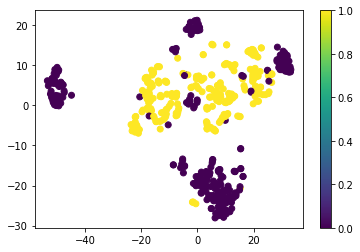

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tSNE_metrics = TSNE(n_components=2, random_state=0).fit_transform(test_predicted_metrics[-1])

plt.scatter(tSNE_metrics[:, 0], tSNE_metrics[:, 1], c=test_true_labels[-1])
plt.colorbar()
plt.savefig("output.png")
plt.show()

In [ ]:

net_ATL2 = Net()
mining_func = miners.TripletMarginMiner(margin = 0.2, distance = distance)
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
loss_func = losses.TripletMarginLoss()
epochs = 10

ATL分配テスト

In [ ]:
for epoch in range (0, epochs):
  train_withATL(net_ATL2,trainloader, loss_func, mining_func, optimizer, epoch)
print('finished')


Epoch 0 Iteration0: Loss = 0.003207031637430191, Number of mined triplets = 12
training now
Epoch 1 Iteration0: Loss = 0.003207031637430191, Number of mined triplets = 12
training now
Epoch 2 Iteration0: Loss = 0.003207031637430191, Number of mined triplets = 12
training now
Epoch 3 Iteration0: Loss = 0.003207031637430191, Number of mined triplets = 12
training now
START
ViolatePair:a1 tensor([], dtype=torch.int64), p tensor([], dtype=torch.int64), a2 tensor([], dtype=torch.int64), n tensor([], dtype=torch.int64)
--------------------
tensor([], dtype=torch.int64)
--------------------
training now
Epoch 5 Iteration0: Loss = 0.003207031637430191, Number of mined triplets = 12
training now
Epoch 6 Iteration0: Loss = 0.003207031637430191, Number of mined triplets = 12
training now
Epoch 7 Iteration0: Loss = 0.003207031637430191, Number of mined triplets = 12
training now
Epoch 8 Iteration0: Loss = 0.003207031637430191, Number of mined triplets = 12
training now
START
ViolatePair:a1 tensor(

In [ ]:
test_predicted_metrics_net_ATL2 = []
test_true_labels_ATL2=[]
for epoch in range (0, epochs):
#     print('Epoch {}/{}'.format(epoch,epochs))
#     print('-'*10)
    #train(net,trainloader, loss_func, mining_func, optimizer, epoch)
    _tmp_metrics2, _tmp_labels2 = test(net_ATL2, testloader, epoch)
    test_predicted_metrics_net_ATL2.append(_tmp_metrics2)
    test_true_labels_ATL2.append(_tmp_labels2)
print('finished')

finished


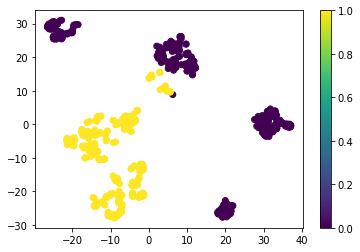

In [ ]:
tSNE_metrics = TSNE(n_components=2, random_state=0).fit_transform(test_predicted_metrics_net_ATL2[-1])

plt.scatter(tSNE_metrics[:, 0], tSNE_metrics[:, 1], c=test_true_labels_ATL2[-1])
plt.colorbar()
plt.savefig("output_ATL2.png")
plt.show()